# Dipy Simulations

Dipy provides tools to generate synthetic signals. These synthetic signals are useful for testing and validating the Dipy procedures during their development. Moreover, for education proposes, these tools are also useful to explore in more detail the properties of different diffusion parameters.

To illustrate the sensitivity and specificity of different DKI metrics, DKI is first processed on single voxel synthetic signals for four different sets of ground truth parameters (cases 1 to 4).

First let's load relevant modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dipy.core.sphere import disperse_charges, HemiSphere
from dipy.sims.voxel import (multi_tensor_dki, single_tensor, multi_tensor, 
                             _check_directions, all_tensor_evecs)
from dipy.data import (get_fnames, get_sphere)
from dipy.io.gradients import read_bvals_bvecs
from dipy.core.gradients import gradient_table
from dipy.reconst.dti import (decompose_tensor, from_lower_triangular)
from dipy.sims.voxel import add_noise
from dipy.data import get_sphere
from dipy.reconst.dti import fractional_anisotropy
from dipy.viz import window, actor
import dipy.reconst.dki as dki
import dipy.reconst.dti as dti
import dipy.reconst.msdki as msdki
sphere = get_sphere('repulsion724')

The synthetic signals for each set of ground truth parameters are generated according to the gradient directions and b-values of the CFIN dataset. So let's load a object containing the acquisition parameters of the CFIN dataset.

In [2]:
fraw, fbval, fbvec, t1_fname = get_fnames('cfin_multib')
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)
gtab = gradient_table(bvals, bvecs)

In [3]:
bval1000 = gtab.bvals == 1000
bval2000 = gtab.bvals == 2000
bval3000 = gtab.bvals == 3000
bval_sel = bval1000 | bval2000 | bval3000

In [4]:
bvals = gtab.bvals[bval_sel]
bvecs = gtab.bvecs[bval_sel, :]

# add 6 b-values
bvals = np.hstack((np.zeros(6), bvals))
bvecs = np.vstack((np.zeros((6, 3)), bvecs))
gtab = gradient_table(bvals, bvecs)

# Voxel Case 1 (Single Tensor)

Define diffusivities of voxel case 1

In [5]:
eval1 = [1.7e-3, 0.3e-3, 0.3e-3];
angle = [(130.0, 0.0)]
stick = _check_directions(angle)
evec1 = all_tensor_evecs(stick[0])

Plot tensor component of voxel case 1

In [6]:
evals = np.array([[[eval1]]])
evecs = np.array([[[evec1]]])

# colors
color1 = np.zeros(evals.shape)
color1[0, 0, 0, 0] = 1;  #red

scene = window.Scene()

tensor_actor = actor.tensor_slicer(evals, evecs, scalar_colors=color1, sphere=sphere, scale=1)
tensor_actor.display(y=0)
tensor_actor.RotateX(110)
scene.add(tensor_actor)

#dir_actor = actor.peak_slicer(np.array([[[stick]]]), np.array([[[1.8]]]), colors=None)
#dir_actor.display(y=0)
#dir_actor.RotateX(90)
#scene.add(dir_actor)

window.show(scene)

window.record(scene, n_frames=1, out_path='case1.png', size=(600, 600))

The ground truth total diffusion tensor will be equal to the single component diffusion tensor of this simulation case. In addition to the tensor shape, we also plot the simulations main direction.

In [7]:
dir_actor = actor.peak_slicer(np.array([[[stick]]]), np.array([[[1.2]]]), linewidth=4, colors=(0, 0, 1))
dir_actor.display(y=0)
dir_actor.RotateX(110)
scene.add(dir_actor)

window.show(scene)
window.record(scene, n_frames=1, out_path='case1_dt_gt.png', size=(600, 600))

Generate signal

In [8]:
signal1 = single_tensor(gtab, S0=1, evals=eval1, evecs=evec1, snr=None)

In [9]:
dti_model = dti.TensorModel(gtab, fit_method='NLLS')
dti_fit = dti_model.fit(signal1)

evals = np.array([[[dti_fit.evals]]])
evecs = np.array([[[dti_fit.evecs]]])

color1 = np.zeros(evals.shape)
color1[0, 0, 0, 0] = 1;  #red

scene = window.Scene()

tensor_actor = actor.tensor_slicer(evals, evecs, scalar_colors=color1, sphere=sphere, scale=1)
tensor_actor.display(y=0)
tensor_actor.RotateX(110)
scene.add(tensor_actor)

dir_actor1 = actor.peak_slicer(np.array([[[stick]]]), np.array([[[1.2]]]), linewidth=4, colors=(0, 0, 1))
dir_actor1.display(y=0)
dir_actor1.RotateX(110)
scene.add(dir_actor1)

window.show(scene)

window.record(scene, n_frames=1, out_path='case1_dt_dti_fit.png', size=(600, 600))

In [10]:
dki_model = dki.DiffusionKurtosisModel(gtab, fit_method='NLS')
dki_fit = dki_model.fit(signal1)

evals = np.array([[[dki_fit.evals]]])
evecs = np.array([[[dki_fit.evecs]]])

color1 = np.zeros(evals.shape)
color1[0, 0, 0, 0] = 1;  #red

scene = window.Scene()

tensor_actor = actor.tensor_slicer(evals, evecs, scalar_colors=color1, sphere=sphere, scale=1)
tensor_actor.display(y=0)
tensor_actor.RotateX(110)
scene.add(tensor_actor)

dir_actor1 = actor.peak_slicer(np.array([[[stick]]]), np.array([[[1.2]]]), linewidth=4, colors=(0, 0, 1))
dir_actor1.display(y=0)
dir_actor1.RotateX(110)
scene.add(dir_actor1)

window.show(scene)

window.record(scene, n_frames=1, out_path='case1_dt_dki_fit.png', size=(600, 600))

In [11]:
akc = dki_fit.akc(sphere)

refmk=0.8

scene = window.Scene()
dki_actor = actor.odf_slicer(np.array([[[akc]]]), sphere=sphere, colormap='Wistia', scale=dki_fit.mk()/refmk)
dki_actor.display(y=0)
dki_actor.RotateX(110)
scene.add(dki_actor)


dir_actor1 = actor.peak_slicer(np.array([[[stick]]]), np.array([[[1.2]]]), linewidth=4, colors=(0, 0, 1))
dir_actor1.display(y=0)
dir_actor1.RotateX(110)
scene.add(dir_actor1)


window.show(scene)

window.record(scene, n_frames=1, out_path='case1_kt_dki_fit.png', size=(600, 600))

# Voxel Case 2 (Intra - and extra-cellular Tensor)

Define diffusivities of voxel case 2

In [12]:
eval1 = [1.4e-3, 0.1e-3, 0.1e-3]
eval2 = [2.0e-3, 0.5e-3, 0.5e-3]
angle1 = (130.0, 0.0)
angle2 = (130.0, 0.0)
stick1 = _check_directions([angle1])
stick2 = _check_directions([angle2])
evec1 = all_tensor_evecs(stick1[0])
evec2 = all_tensor_evecs(stick2[0])

Plot the two tensor components of voxel case 2.

In [13]:
evals = np.array([[[eval1, eval2]]])
evecs =  np.array([[[evec1, evec2]]])

colors = np.zeros(evals.shape)
colors[0, 0, 0, 2] = 1;  # blue
colors[0, 0, 1, 0] = 1;  # yellow
colors[0, 0, 1, 1] = 1;  

scene = window.Scene()

tensor_actor = actor.tensor_slicer(evals, evecs, scalar_colors=colors, sphere=sphere, scale=1)
tensor_actor.display(y=0)
tensor_actor.RotateX(110)
scene.add(tensor_actor)

window.show(scene)

window.record(scene, n_frames=1, out_path='case2.png', size=(600, 600))

The ground truth total diffusion tensor and total kurtosis tensors can be computed from the multi_tensor_dki. Since this function ignores high-order-terms, it produced diffusion and kurtosis tensors are analogous to the predicted tensors from equations 22 and 23.

In [14]:
mevals = [eval1, eval2]
S0 = 1
angles = [angle1, angle2]
fractions = [50, 50]
signal2_gt, dt, kt = multi_tensor_dki(gtab, mevals, S0, angles, fractions, snr=None)

dki_model = dki.DiffusionKurtosisModel(gtab, fit_method='NLS')
dki_fit = dki_model.fit(signal2_gt)

Let's plot the ground truth DT

In [15]:
evals = np.array([[[dki_fit.evals]]])
evecs = np.array([[[dki_fit.evecs]]])

reffa = dki_fit.fa
refmd = dki_fit.md
refmk = dki_fit.mk()

color1 = np.zeros(evals.shape)
color1[0, 0, 0, 0] = dki_fit.md/refmd;  #red

scene = window.Scene()

tensor_actor = actor.tensor_slicer(evals, evecs, scalar_colors=color1, sphere=sphere, scale=dki_fit.md/refmd)
tensor_actor.display(y=0)
tensor_actor.RotateX(110)
scene.add(tensor_actor)

dir_actor1 = actor.peak_slicer(np.array([[[stick1]]]), np.array([[[1.2]]]), linewidth=4, colors=(0, 0, 1))
dir_actor1.display(y=0)
dir_actor1.RotateX(110)
scene.add(dir_actor1)

window.show(scene)

window.record(scene, n_frames=1, out_path='case2_dt_gt.png', size=(600, 600))

Let's plot the ground truth KT

In [16]:
akc = dki_fit.akc(sphere)

scene = window.Scene()
dki_actor = actor.odf_slicer(np.array([[[akc]]]), sphere=sphere, colormap='Wistia', scale=dki_fit.mk()/refmk)
dki_actor.display(y=0)
dki_actor.RotateX(110)
scene.add(dki_actor)


dir_actor1 = actor.peak_slicer(np.array([[[stick1]]]), np.array([[[1.2]]]), linewidth=4, colors=(0, 0, 1))
dir_actor1.display(y=0)
dir_actor1.RotateX(110)
scene.add(dir_actor1)


window.show(scene)

window.record(scene, n_frames=1, out_path='case2_kt_gt.png', size=(600, 600))

Let's know produce signal considering high order terms.

In [17]:
signal2, st = multi_tensor(gtab, mevals, S0, angles, fractions, snr=None)

Let's fit dti for reference

In [18]:
dti_model = dti.TensorModel(gtab, fit_method='NLLS')
dti_fit = dti_model.fit(signal2)

evals = np.array([[[dti_fit.evals]]])
evecs = np.array([[[dti_fit.evecs]]])

color1 = np.zeros(evals.shape)
color1[0, 0, 0, 0] = dti_fit.md/refmd;  #red

scene = window.Scene()

tensor_actor = actor.tensor_slicer(evals, evecs, scalar_colors=color1, sphere=sphere, scale=dti_fit.md/refmd)
tensor_actor.display(y=0)
tensor_actor.RotateX(110)
scene.add(tensor_actor)

dir_actor1 = actor.peak_slicer(np.array([[[stick1]]]), np.array([[[1.2]]]), linewidth=4, colors=(0, 0, 1))
dir_actor1.display(y=0)
dir_actor1.RotateX(110)
scene.add(dir_actor1)


window.show(scene)

window.record(scene, n_frames=1, out_path='case2_dt_dti_fit.png', size=(600, 600))

Let's plot dt for dki fit

In [19]:
dki_fit = dki_model.fit(signal2)

evals = np.array([[[dki_fit.evals]]])
evecs = np.array([[[dki_fit.evecs]]])

color1 = np.zeros(evals.shape)
color1[0, 0, 0, 0] = dki_fit.md/refmd;  #red

scene = window.Scene()

tensor_actor = actor.tensor_slicer(evals, evecs, scalar_colors=color1, sphere=sphere, scale=dki_fit.md/refmd)
tensor_actor.display(y=0)
tensor_actor.RotateX(110)
scene.add(tensor_actor)

dir_actor1 = actor.peak_slicer(np.array([[[stick1]]]), np.array([[[1.2]]]), linewidth=4, colors=(0, 0, 1))
dir_actor1.display(y=0)
dir_actor1.RotateX(110)
scene.add(dir_actor1)

window.show(scene)

window.record(scene, n_frames=1, out_path='case2_dt_dki_fit.png', size=(600, 600))

Let's plot fitted KT

In [20]:
akc = dki_fit.akc(sphere)

scene = window.Scene()
dki_actor = actor.odf_slicer(np.array([[[akc]]]), sphere=sphere, colormap='Wistia', scale=dki_fit.mk()/refmk)
dki_actor.display(y=0)
dki_actor.RotateX(110)
scene.add(dki_actor)


dir_actor1 = actor.peak_slicer(np.array([[[stick1]]]), np.array([[[1.2]]]), linewidth=4, colors=(0, 0, 1))
dir_actor1.display(y=0)
dir_actor1.RotateX(110)
scene.add(dir_actor1)


window.show(scene)

window.record(scene, n_frames=1, out_path='case2_kt_dki_fit.png', size=(600, 600))

# Voxel case 3 (simplistic model of axonal "degeneration")

In [21]:
eval1 = [1.4e-3, 0.1e-3, 0.1e-3]
eval2 = [2e-3, 0.7e-3, 0.7e-3]
angle1 = (130.0, 0.0)
angle2 = (130.0, 0.0)
stick1 = _check_directions([angle1])
stick2 = _check_directions([angle2])
evec1 = all_tensor_evecs(stick1[0])
evec2 = all_tensor_evecs(stick2[0])

Plot the two tensor components of voxel case 2.

In [22]:
evals = np.array([[[eval1, eval2]]])
evecs =  np.array([[[evec1, evec2]]])

colors = np.zeros(evals.shape)
colors[0, 0, 0, 2] = 1;  # blue
colors[0, 0, 1, 0] = 1;  # orange
colors[0, 0, 1, 1] = 0.5;  

scene = window.Scene()

tensor_actor = actor.tensor_slicer(evals, evecs, scalar_colors=colors, sphere=sphere, scale=1)
tensor_actor.display(y=0)
tensor_actor.RotateX(110)
scene.add(tensor_actor)

window.show(scene)

window.record(scene, n_frames=1, out_path='case3.png', size=(600, 600))

Plot GT diffusion tensor

In [23]:
mevals = [eval1, eval2]
S0 = 1
angles = [angle1, angle2]
fractions = [30, 70]
signal3_gt, dt, kt = multi_tensor_dki(gtab, mevals, S0, angles, fractions, snr=None)

dki_fit = dki_model.fit(signal3_gt)

evals = np.array([[[dki_fit.evals]]])
evecs = np.array([[[dki_fit.evecs]]])

#reffa = dki_fit.fa
#refmd = dki_fit.md
#refmk = dki_fit.mk()

color1 = np.zeros(evals.shape)
color1[0, 0, 0, 0] = dki_fit.md/refmd;  #red

scene = window.Scene()

tensor_actor = actor.tensor_slicer(evals, evecs, scalar_colors=color1, sphere=sphere, scale=dki_fit.md/refmd)
tensor_actor.display(y=0)
tensor_actor.RotateX(110)
scene.add(tensor_actor)

dir_actor1 = actor.peak_slicer(np.array([[[stick1]]]), np.array([[[1.4]]]), linewidth=4, colors=(0, 0, 1))
dir_actor1.display(y=0)
dir_actor1.RotateX(110)
scene.add(dir_actor1)

window.show(scene)

window.record(scene, n_frames=1, out_path='case3_dt_gt.png', size=(600, 600))

Plot ground truth kurtosis tensor

In [24]:
akc = dki_fit.akc(sphere)

scene = window.Scene()
dki_actor = actor.odf_slicer(np.array([[[akc]]]), sphere=sphere, colormap='Wistia', scale=dki_fit.mk()/refmk)
dki_actor.display(y=0)
dki_actor.RotateX(110)
scene.add(dki_actor)


dir_actor1 = actor.peak_slicer(np.array([[[stick1]]]), np.array([[[1.2]]]), linewidth=4, colors=(0, 0, 1))
dir_actor1.display(y=0)
dir_actor1.RotateX(110)
scene.add(dir_actor1)

window.show(scene)

window.record(scene, n_frames=1, out_path='case3_kt_gt.png', size=(600, 600))

Plot reference DTI diffusion tensor fit

In [25]:
signal3, dt, kt = multi_tensor_dki(gtab, mevals, S0, angles, fractions, snr=None)

dti_model = dti.TensorModel(gtab, fit_method='NLLS')
dti_fit = dti_model.fit(signal3)

evals = np.array([[[dti_fit.evals]]])
evecs = np.array([[[dti_fit.evecs]]])

color1 = np.zeros(evals.shape)
color1[0, 0, 0, 0] = dti_fit.md/refmd;  #red

scene = window.Scene()

tensor_actor = actor.tensor_slicer(evals, evecs, scalar_colors=color1, sphere=sphere, scale=dti_fit.md/refmd)
tensor_actor.display(y=0)
tensor_actor.RotateX(110)
scene.add(tensor_actor)

dir_actor1 = actor.peak_slicer(np.array([[[stick1]]]), np.array([[[1.4]]]), linewidth=4, colors=(0, 0, 1))
dir_actor1.display(y=0)
dir_actor1.RotateX(110)
scene.add(dir_actor1)

window.show(scene)

window.record(scene, n_frames=1, out_path='case3_dt_dti_fit.png', size=(600, 600))

Plot DKI diffusion tensor fit

In [26]:
dki_fit = dki_model.fit(signal3)

evals = np.array([[[dki_fit.evals]]])
evecs = np.array([[[dki_fit.evecs]]])

color1 = np.zeros(evals.shape)
color1[0, 0, 0, 0] = dki_fit.md/refmd;  #red

scene = window.Scene()

tensor_actor = actor.tensor_slicer(evals, evecs, scalar_colors=color1, sphere=sphere, scale=dki_fit.md/refmd)
tensor_actor.display(y=0)
tensor_actor.RotateX(110)
scene.add(tensor_actor)

dir_actor1 = actor.peak_slicer(np.array([[[stick1]]]), np.array([[[1.4]]]), linewidth=4, colors=(0, 0, 1))
dir_actor1.display(y=0)
dir_actor1.RotateX(110)
scene.add(dir_actor1)

window.show(scene)

window.record(scene, n_frames=1, out_path='case3_dt_dki_fit.png', size=(600, 600))

Plot DKI kurtosis tensor fit

In [27]:
akc = dki_fit.akc(sphere)

scene = window.Scene()
dki_actor = actor.odf_slicer(np.array([[[akc]]]), sphere=sphere, colormap='Wistia', scale=dki_fit.mk()/refmk)
dki_actor.display(y=0)
dki_actor.RotateX(110)
scene.add(dki_actor)


dir_actor1 = actor.peak_slicer(np.array([[[stick1]]]), np.array([[[1.2]]]), linewidth=4, colors=(0, 0, 1))
dir_actor1.display(y=0)
dir_actor1.RotateX(110)
scene.add(dir_actor1)

window.show(scene)

window.record(scene, n_frames=1, out_path='case3_kt_dki_fit.png', size=(600, 600))

# Voxel Case 4 (Crossing Fibers  )¶

In [28]:
eval1 = [1.4e-3, 0.1e-3, 0.1e-3]
eval2 = [2e-3, 0.5e-3, 0.5e-3]
eval3 = [1.4e-3, 0.1e-3, 0.1e-3]
eval4 = [2e-3, 0.5e-3, 0.5e-3]
angle1 = (30.0, 0.0)
angle2 = (30.0, 0.0)
angle3 = (150.0, 0.0)
angle4 = (150.0, 0.0)
stick1 = _check_directions([angle1])
stick2 = _check_directions([angle2])
stick3 = _check_directions([angle3])
stick4 = _check_directions([angle4])
evec1 = all_tensor_evecs(stick1[0])
evec2 = all_tensor_evecs(stick2[0])
evec3 = all_tensor_evecs(stick3[0])
evec4 = all_tensor_evecs(stick4[0])

Plot case 4 components

In [29]:
evals = np.array([np.array([[eval1, eval2]]),
                   np.array([[eval3, eval4]])])
stick = _check_directions(angle)
evecs =  np.array([[[evec1, evec2]],
                   [[evec3, evec4]]])

colors = np.zeros(evals.shape)

colors[0, 0, 0, 2] = 1;  #Blue

colors[0, 0, 1, 0] = 1;  #Yellow
colors[0, 0, 1, 1] = 1;

colors[1, 0, 0, 2] = 1;  #Blue

colors[1, 0, 1, 0] = 1;  #Yellow
colors[1, 0, 1, 1] = 1;

scene = window.Scene()

tensor_actor = actor.tensor_slicer(evals, evecs, scalar_colors=colors, sphere=sphere, scale=0.8)
tensor_actor.display(y=0)
tensor_actor.RotateX(100)
scene.add(tensor_actor)

window.show(scene)

window.record(scene, n_frames=1, out_path='case4.png', size=(600, 600))

Plot gt DT

In [30]:
mevals = [eval1, eval2, eval3, eval4]
S0 = 1
angles = [angle1, angle2, angle3, angle4]
fractions = [25.0, 25.0, 25.0, 25.0]

signal4_gt, dt, kt = multi_tensor_dki(gtab, mevals, S0, angles, fractions, snr=None)

dki_fit = dki_model.fit(signal4_gt)

evals = np.array([[[dki_fit.evals]]])
evecs = np.array([[[dki_fit.evecs]]])

#reffa = dki_fit.fa
#refmd = dki_fit.md
#refmk = dki_fit.mk()

color1 = np.zeros(evals.shape)
color1[0, 0, 0, 0] = dki_fit.md/refmd;  #red

scene = window.Scene()

tensor_actor = actor.tensor_slicer(evals, evecs, scalar_colors=color1, sphere=sphere, scale=dki_fit.md/refmd)
tensor_actor.display(y=0)
tensor_actor.RotateX(100)
scene.add(tensor_actor)

dir_actor1 = actor.peak_slicer(np.array([[[stick1]]]), np.array([[[1.2]]]), linewidth=4, colors=(0, 0, 1))
dir_actor1.display(y=0)
dir_actor1.RotateX(100)
scene.add(dir_actor1)

dir_actor2 = actor.peak_slicer(np.array([[[stick3]]]), np.array([[[1.2]]]), linewidth=4, colors=(0, 0, 1))
dir_actor2.display(y=0)
dir_actor2.RotateX(100)
scene.add(dir_actor2)

dtidir_actor = actor.peak_slicer(np.array([[[dki_fit.directions[0]]]]), np.array([[[1.2]]]), linewidth=3, colors=(1, 0, 0))
dtidir_actor.display(y=0)
dtidir_actor.RotateX(100)
scene.add(dtidir_actor)


window.show(scene)

window.record(scene, n_frames=1, out_path='case4_dt_gt.png', size=(600, 600))

Plot gt KT

In [31]:
akc = dki_fit.akc(sphere)

scene = window.Scene()
dki_actor = actor.odf_slicer(np.array([[[akc]]]), sphere=sphere, colormap='Wistia', scale=dki_fit.mk()/refmk)
dki_actor.display(y=0)
dki_actor.RotateX(100)
scene.add(dki_actor)


dir_actor1 = actor.peak_slicer(np.array([[[stick1]]]), np.array([[[1.2]]]), linewidth=4, colors=(0, 0, 1))
dir_actor1.display(y=0)
dir_actor1.RotateX(100)
scene.add(dir_actor1)

dir_actor2 = actor.peak_slicer(np.array([[[stick3]]]), np.array([[[1.2]]]), linewidth=4, colors=(0, 0, 1))
dir_actor2.display(y=0)
dir_actor2.RotateX(100)
scene.add(dir_actor2)


dtidir_actor = actor.peak_slicer(np.array([[[dki_fit.directions[0]]]]), np.array([[[1.2]]]), linewidth=3, colors=(1, 0, 0))
dtidir_actor.display(y=0)
dtidir_actor.RotateX(100)
scene.add(dtidir_actor)

window.show(scene)

window.record(scene, n_frames=1, out_path='case4_kt_gt.png', size=(600, 600))

In [32]:
signal4, st = multi_tensor(gtab, mevals, S0, angles, fractions, snr=None)

Plot ref DTI DT

In [33]:
dti_fit = dti_model.fit(signal4)

evals = np.array([[[dti_fit.evals]]])
evecs = np.array([[[dti_fit.evecs]]])

color1 = np.zeros(evals.shape)
color1[0, 0, 0, 0] = dti_fit.md/refmd;  #red

scene = window.Scene()

tensor_actor = actor.tensor_slicer(evals, evecs, scalar_colors=color1, sphere=sphere, scale=dti_fit.md/refmd)
tensor_actor.display(y=0)
tensor_actor.RotateX(100)
scene.add(tensor_actor)

dir_actor1 = actor.peak_slicer(np.array([[[stick1]]]), np.array([[[1.2]]]), linewidth=4, colors=(0, 0, 1))
dir_actor1.display(y=0)
dir_actor1.RotateX(100)
scene.add(dir_actor1)

dir_actor2 = actor.peak_slicer(np.array([[[stick3]]]), np.array([[[1.2]]]), linewidth=4, colors=(0, 0, 1))
dir_actor2.display(y=0)
dir_actor2.RotateX(100)
scene.add(dir_actor2)

dtidir_actor = actor.peak_slicer(np.array([[[dti_fit.directions[0]]]]), np.array([[[1.2]]]), linewidth=3, colors=(1, 0, 0))
dtidir_actor.display(y=0)
dtidir_actor.RotateX(100)
scene.add(dtidir_actor)


window.show(scene)

window.record(scene, n_frames=1, out_path='case4_dt_dti_fit.png', size=(600, 600))

Plot DKI DT

In [34]:
dki_fit = dki_model.fit(signal4)

evals = np.array([[[dti_fit.evals]]])
evecs = np.array([[[dti_fit.evecs]]])

color1 = np.zeros(evals.shape)
color1[0, 0, 0, 0] = dki_fit.md/refmd;  #red

scene = window.Scene()

tensor_actor = actor.tensor_slicer(evals, evecs, scalar_colors=color1, sphere=sphere, scale=dki_fit.md/refmd)
tensor_actor.display(y=0)
tensor_actor.RotateX(100)
scene.add(tensor_actor)

dir_actor1 = actor.peak_slicer(np.array([[[stick1]]]), np.array([[[1.2]]]), linewidth=4, colors=(0, 0, 1))
dir_actor1.display(y=0)
dir_actor1.RotateX(100)
scene.add(dir_actor1)

dir_actor2 = actor.peak_slicer(np.array([[[stick3]]]), np.array([[[1.2]]]), linewidth=4, colors=(0, 0, 1))
dir_actor2.display(y=0)
dir_actor2.RotateX(100)
scene.add(dir_actor2)

dtidir_actor = actor.peak_slicer(np.array([[[dki_fit.directions[0]]]]), np.array([[[1.2]]]), linewidth=3, colors=(1, 0, 0))
dtidir_actor.display(y=0)
dtidir_actor.RotateX(100)
scene.add(dtidir_actor)


window.show(scene)

window.record(scene, n_frames=1, out_path='case4_dt_dki_fit.png', size=(600, 600))

Plot DKI KT

In [35]:
akc = dki_fit.akc(sphere)

scene = window.Scene()
dki_actor = actor.odf_slicer(np.array([[[akc]]]), sphere=sphere, colormap='Wistia', scale=dki_fit.mk()/refmk)
dki_actor.display(y=0)
dki_actor.RotateX(100)
scene.add(dki_actor)


dir_actor1 = actor.peak_slicer(np.array([[[stick1]]]), np.array([[[1.2]]]), linewidth=4, colors=(0, 0, 1))
dir_actor1.display(y=0)
dir_actor1.RotateX(100)
scene.add(dir_actor1)

dir_actor2 = actor.peak_slicer(np.array([[[stick3]]]), np.array([[[1.2]]]), linewidth=4, colors=(0, 0, 1))
dir_actor2.display(y=0)
dir_actor2.RotateX(100)
scene.add(dir_actor2)

dtidir_actor = actor.peak_slicer(np.array([[[dki_fit.directions[0]]]]), np.array([[[1.2]]]), linewidth=3, colors=(1, 0, 0))
dtidir_actor.display(y=0)
dtidir_actor.RotateX(100)
scene.add(dtidir_actor)

window.show(scene)

window.record(scene, n_frames=1, out_path='case4_kt_dki_fit.png', size=(600, 600))

# Figure 2

In [36]:
dwi = np.zeros((4,) + gtab.bvals.shape)
dwi[0, :] = signal1
dwi[1, :] = signal2
dwi[2, :] = signal3
dwi[3, :] = signal4

Define reconstruction models

In [37]:
dki_model = dki.DiffusionKurtosisModel(gtab, fit_method='NLS')
dki_fit = dki_model.fit(dwi)
fa = dki_fit.fa
md = dki_fit.md
rd = dki_fit.rd
ad = dki_fit.ad
mk = dki_fit.mk()
rk = dki_fit.rk()
ak = dki_fit.ak()
mkt = dki_fit.mkt()
kfa = dki_fit.kfa

msdki_model = msdki.MeanDiffusionKurtosisModel(gtab)
msdki_fit = msdki_model.fit(dwi)
msk = msdki_fit.msk

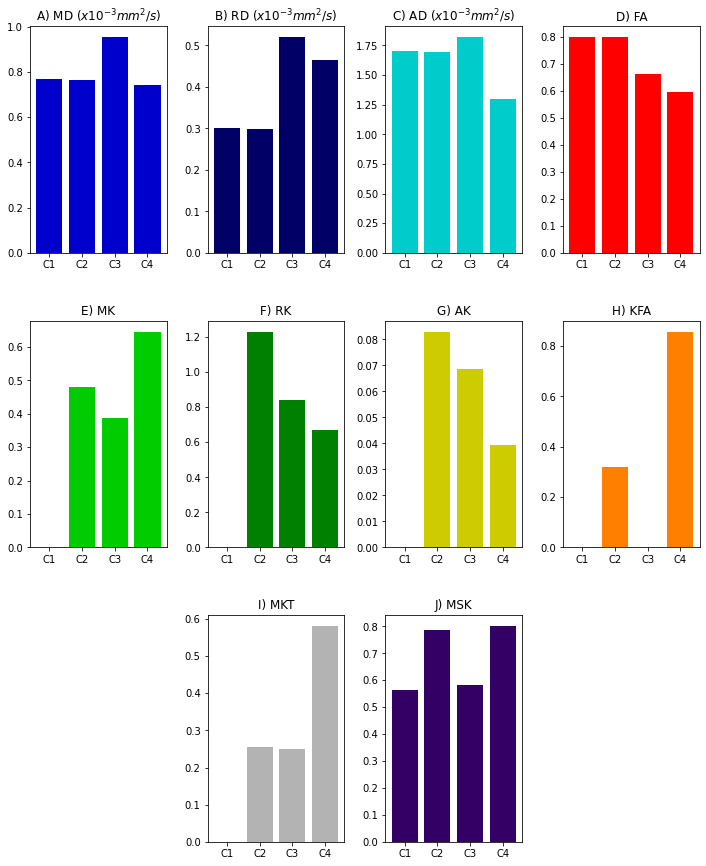

In [38]:
cases = [1, 2, 3, 4]

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(12, 15))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

axs[0, 0].bar(cases, md*1000, linewidth=1.0, color=[0.0, 0.0, 0.8])
axs[0, 0].set_title('A) MD ($x10^{-3}mm^2/s$)')
axs[0, 1].bar(cases, rd*1000, linewidth=1.0, color=[0.0, 0.0, 0.4])
axs[0, 1].set_title('B) RD ($x10^{-3}mm^2/s$)')
axs[0, 2].bar(cases, ad*1000, linewidth=1.0, color=[0.0, 0.8, 0.8])
axs[0, 2].set_title('C) AD ($x10^{-3}mm^2/s$)')
axs[0, 3].bar(cases, fa, linewidth=1.0, color=[1.0, 0.0, 0.0])
axs[0, 3].set_title('D) FA')

axs[1, 0].bar(cases, mk, linewidth=1.0, color=[0.0, 0.8, 0.0])
axs[1, 0].set_title('E) MK')
axs[1, 1].bar(cases, rk, linewidth=1.0, color=[0.0, 0.5, 0.0])
axs[1, 1].set_title('F) RK')
axs[1, 2].bar(cases, ak, linewidth=1.0, color=[0.8, 0.8, 0.0])
axs[1, 2].set_title('G) AK')
axs[1, 3].bar(cases, kfa, linewidth=1.0, color=[1, 0.5, 0.0])
axs[1, 3].set_title('H) KFA')


axs[2, 1].bar(cases, mkt, linewidth=1.0, color=[0.7, 0.7, 0.7])
axs[2, 1].set_title('I) MKT')
axs[2, 2].bar(cases, msk, linewidth=1.0, color=[0.2, 0.0, 0.4])
axs[2, 2].set_title('J) MSK')

for ii in range(3):
    for jj in range(4):
        axs[ii, jj].set_xticks(cases)
        axs[ii, jj].set_xticklabels(['C1', 'C2', 'C3', 'C4'])

axs[2, 0].axis('off')
axs[2, 3].axis('off')

fig.savefig('Figure2.png', bbox_inches='tight')